In [1]:
import re
import pandas as pd
import requests 
from bs4 import BeautifulSoup 

A continuación, realizaré el Scraping de la información de los resultados del plebiscito realizado en colombia el 2 de Octubre del año 2016. 

Para este proceso, se hizo un muestreo de 1122 municipios del total informado en esta votación.

Este es el link de la información: https://elecciones.registraduria.gov.co/pre_plebis_2016/99PL/DPLZZZZZZZZZZZZZZZZZ_L1.htm

In [2]:
municipios=pd.read_excel("links_municipios.xlsx")

In [4]:
len(municipios)

1122

In [5]:
municipios['link_real']=municipios['URL MUNICIPIO'].map(lambda x:x.replace('http://plebiscito.registraduria.gov.co/', 'https://elecciones.registraduria.gov.co/pre_plebis_2016/'))

In [6]:
municipios.head()

,URL MUNICIPIO,MUNICIPIO,DEPARTAMENTO,link_real
0,http://plebiscito.registraduria.gov.co/99PL/DP...,EL ENCANTO,AMAZONAS,https://elecciones.registraduria.gov.co/pre_pl...
1,http://plebiscito.registraduria.gov.co/99PL/DP...,LA CHORRERA,AMAZONAS,https://elecciones.registraduria.gov.co/pre_pl...
2,http://plebiscito.registraduria.gov.co/99PL/DP...,LA PEDRERA,AMAZONAS,https://elecciones.registraduria.gov.co/pre_pl...
3,http://plebiscito.registraduria.gov.co/99PL/DP...,LA VICTORIA,AMAZONAS,https://elecciones.registraduria.gov.co/pre_pl...
4,http://plebiscito.registraduria.gov.co/99PL/DP...,LETICIA,AMAZONAS,https://elecciones.registraduria.gov.co/pre_pl...


In [68]:
def busqueda(municipio):
    html = requests.get(municipio, verify=False).text
    # estructurar datos a partir de archivos HTML
    soup = BeautifulSoup(html, "lxml")
    a=re.findall('<div class="cajaDatosHeader"><b>[\w\s+%.-]+|<div class="cajaDatosBody"><span class="porcentajesCajas">[\w,+%.-]+|</span><br/><span class="descripcionCaja">[\w,\s%.-]+', str(soup))
    ba=[]
    ba.append(a[1])
    bb=[]
    bb.append(a[2])
    m=re.search("([\w]+) de ([\w]+)", str(bb))
    bc=[]
    bc.append(a[4])
    bd=[]
    bd.append(a[5])
    v1=re.findall("[\d.]+", str(bd))[0]
    v2=re.findall("[\d.]+", str(bd))[1]
    b=re.findall('<div class="skill-bar-percent pVotos">[\w,%()\s.]+|<div class="skill-bar-percent">[\w,()%\s.]+|<div class="skillbar-title"><span>[\w(),%\s.]+', str(soup))
    be=[]
    be.append(b[1])
    app=re.findall("[\d,%.]+", str(be))


    bf=[]
    bf.append(b[2])
    ap=re.search("[\d.]+", str(bf))

    bg=[]
    bg.append(b[4])
    noapp=re.findall("[\d,%.]+", str(bg))

    bh=[]
    bh.append(b[5])
    noap=re.search("[\d.]+", str(bh))
    c=re.findall('<div class="contenido"><b>[\w\s.¡]+|</b><br/>[\d.]+', str(soup))
    ca=[]
    ca.append(c[1])
    nu1=re.findall("[\d.]+", str(ca).replace("</b><br/>", ""))
    cb=[]
    cb.append(c[3])
    nu2=re.findall("[\d.]+", str(cb))
    cc=[]
    cc.append(c[5])
    nu3=re.findall("[\d.]+", str(cc))

    base=pd.DataFrame()

    base['link_real']=''
    base['nombre_muni']=''
    base['nombre_dep']=''
    base['mesas_informadas%']=ba
    base['mesas_informadas%']=base['mesas_informadas%'].map(lambda x:x.replace('<div class="cajaDatosBody"><span class="porcentajesCajas">',""))
    base["mesas_informadas%"]=base["mesas_informadas%"].map(lambda x:str(x).replace("%","").replace(",",".")).astype(float)
    base['mesas_usadas']=m.group(1)
    base['mesas_usadas']=base['mesas_usadas'].map(lambda x:str(x).replace("%","").replace(".","")).astype(int)
    base['mesas_disponibles']=m.group(2)
    base['mesas_disponibles']=base['mesas_disponibles'].map(lambda x:str(x).replace("%","").replace(".","")).astype(int)

    base['votantes%']=bc
    base['votantes%']=base['votantes%'].map(lambda x:x.replace('<div class="cajaDatosBody"><span class="porcentajesCajas">',""))
    base["votantes%"]=base["votantes%"].map(lambda x:str(x).replace("%","").replace(",",".")).astype(float)
    try:
        base['votantes_cumplieron']=v1
        base['votantes_cumplieron']=base['votantes_cumplieron'].map(lambda x:str(x).replace("%","").replace(".","")).astype(int)
        base['votantes_habilidatos']=v2
        base['votantes_habilidatos']=base['votantes_habilidatos'].map(lambda x:str(x).replace("%","").replace(".","")).astype(int)
    except:
        base['votantes_cumplieron']=None
        base['votantes_habilidatos']=None
    base['apoya%']=app
    base["apoya%"]=base["apoya%"].map(lambda x:str(x).replace("%","").replace(",",".")).astype(float)
    base['apoya#']=ap.group(0)
    base['apoya#']=base['apoya#'].map(lambda x:str(x).replace(".","")).astype(int)
    base['no_apoya%']=noapp
    base["no_apoya%"]=base["no_apoya%"].map(lambda x:str(x).replace("%","").replace(",",".")).astype(float)
    base['no_apoya#']=noap.group(0)
    base['no_apoya#']=base['no_apoya#'].map(lambda x:str(x).replace(".","")).astype(int)
    base['votos_validos']=nu1
    base['votos_validos']=base['votos_validos'].map(lambda x:str(x).replace("%","").replace(".","")).astype(int)
    base['votos_no_marcados']=nu2
    base['votos_no_marcados']=base['votos_no_marcados'].map(lambda x:str(x).replace("%","").replace(".","")).astype(int)
    base['votos_anulados']=nu3
    base["votos_anulados"]=base["votos_anulados"].map(lambda x:str(x).replace(".","")).astype(int)
    return base


In [ ]:
base_total=pd.DataFrame()
for i in range(len(municipios['link_real'])):
    base=busqueda(municipios['link_real'][i])
    base_total=base_total.append(base).reset_index(drop=True)
    base_total['link_real'][i]=municipios['link_real'][i]
    base_total['nombre_muni'][i]=municipios['MUNICIPIO'][i]
    base_total['nombre_dep'][i]=municipios['DEPARTAMENTO'][i]

In [70]:
base_total.head()

,link_real,nombre_muni,nombre_dep,mesas_informadas%,mesas_usadas,mesas_disponibles,votantes%,votantes_cumplieron,votantes_habilidatos,apoya%,apoya#,no_apoya%,no_apoya#,votos_validos,votos_no_marcados,votos_anulados
0,https://elecciones.registraduria.gov.co/pre_pl...,EL ENCANTO,AMAZONAS,100.0,2,2,30.01,223,743,76.92,170,23.07,51,221,0,2
1,https://elecciones.registraduria.gov.co/pre_pl...,LA CHORRERA,AMAZONAS,100.0,3,3,35.53,366,1030,82.87,300,17.12,62,362,1,3
2,https://elecciones.registraduria.gov.co/pre_pl...,LA PEDRERA,AMAZONAS,100.0,3,3,21.42,216,1008,88.31,189,11.68,25,214,1,1
3,https://elecciones.registraduria.gov.co/pre_pl...,LA VICTORIA,AMAZONAS,100.0,1,1,27.77,5,18,80.00,4,20.00,1,5,0,0
4,https://elecciones.registraduria.gov.co/pre_pl...,LETICIA,AMAZONAS,100.0,82,82,25.98,8990,34592,49.66,4403,50.33,4463,8866,40,84


In [71]:
base_total.to_excel("base_total1.xlsx")
base_total.to_csv("base_total1.csv", encoding='utf-8', index=False)

In [72]:
# # !pip install pdf2image

# importing all the required modules
from pdf2image import convert_from_path
pages = convert_from_path('Plebiscito_Colombia.pdf', 500)
for i in range(len(pages)):
    pages[i].save('%s.jpg'%i, 'JPEG')

Populating the interactive namespace from numpy and matplotlib


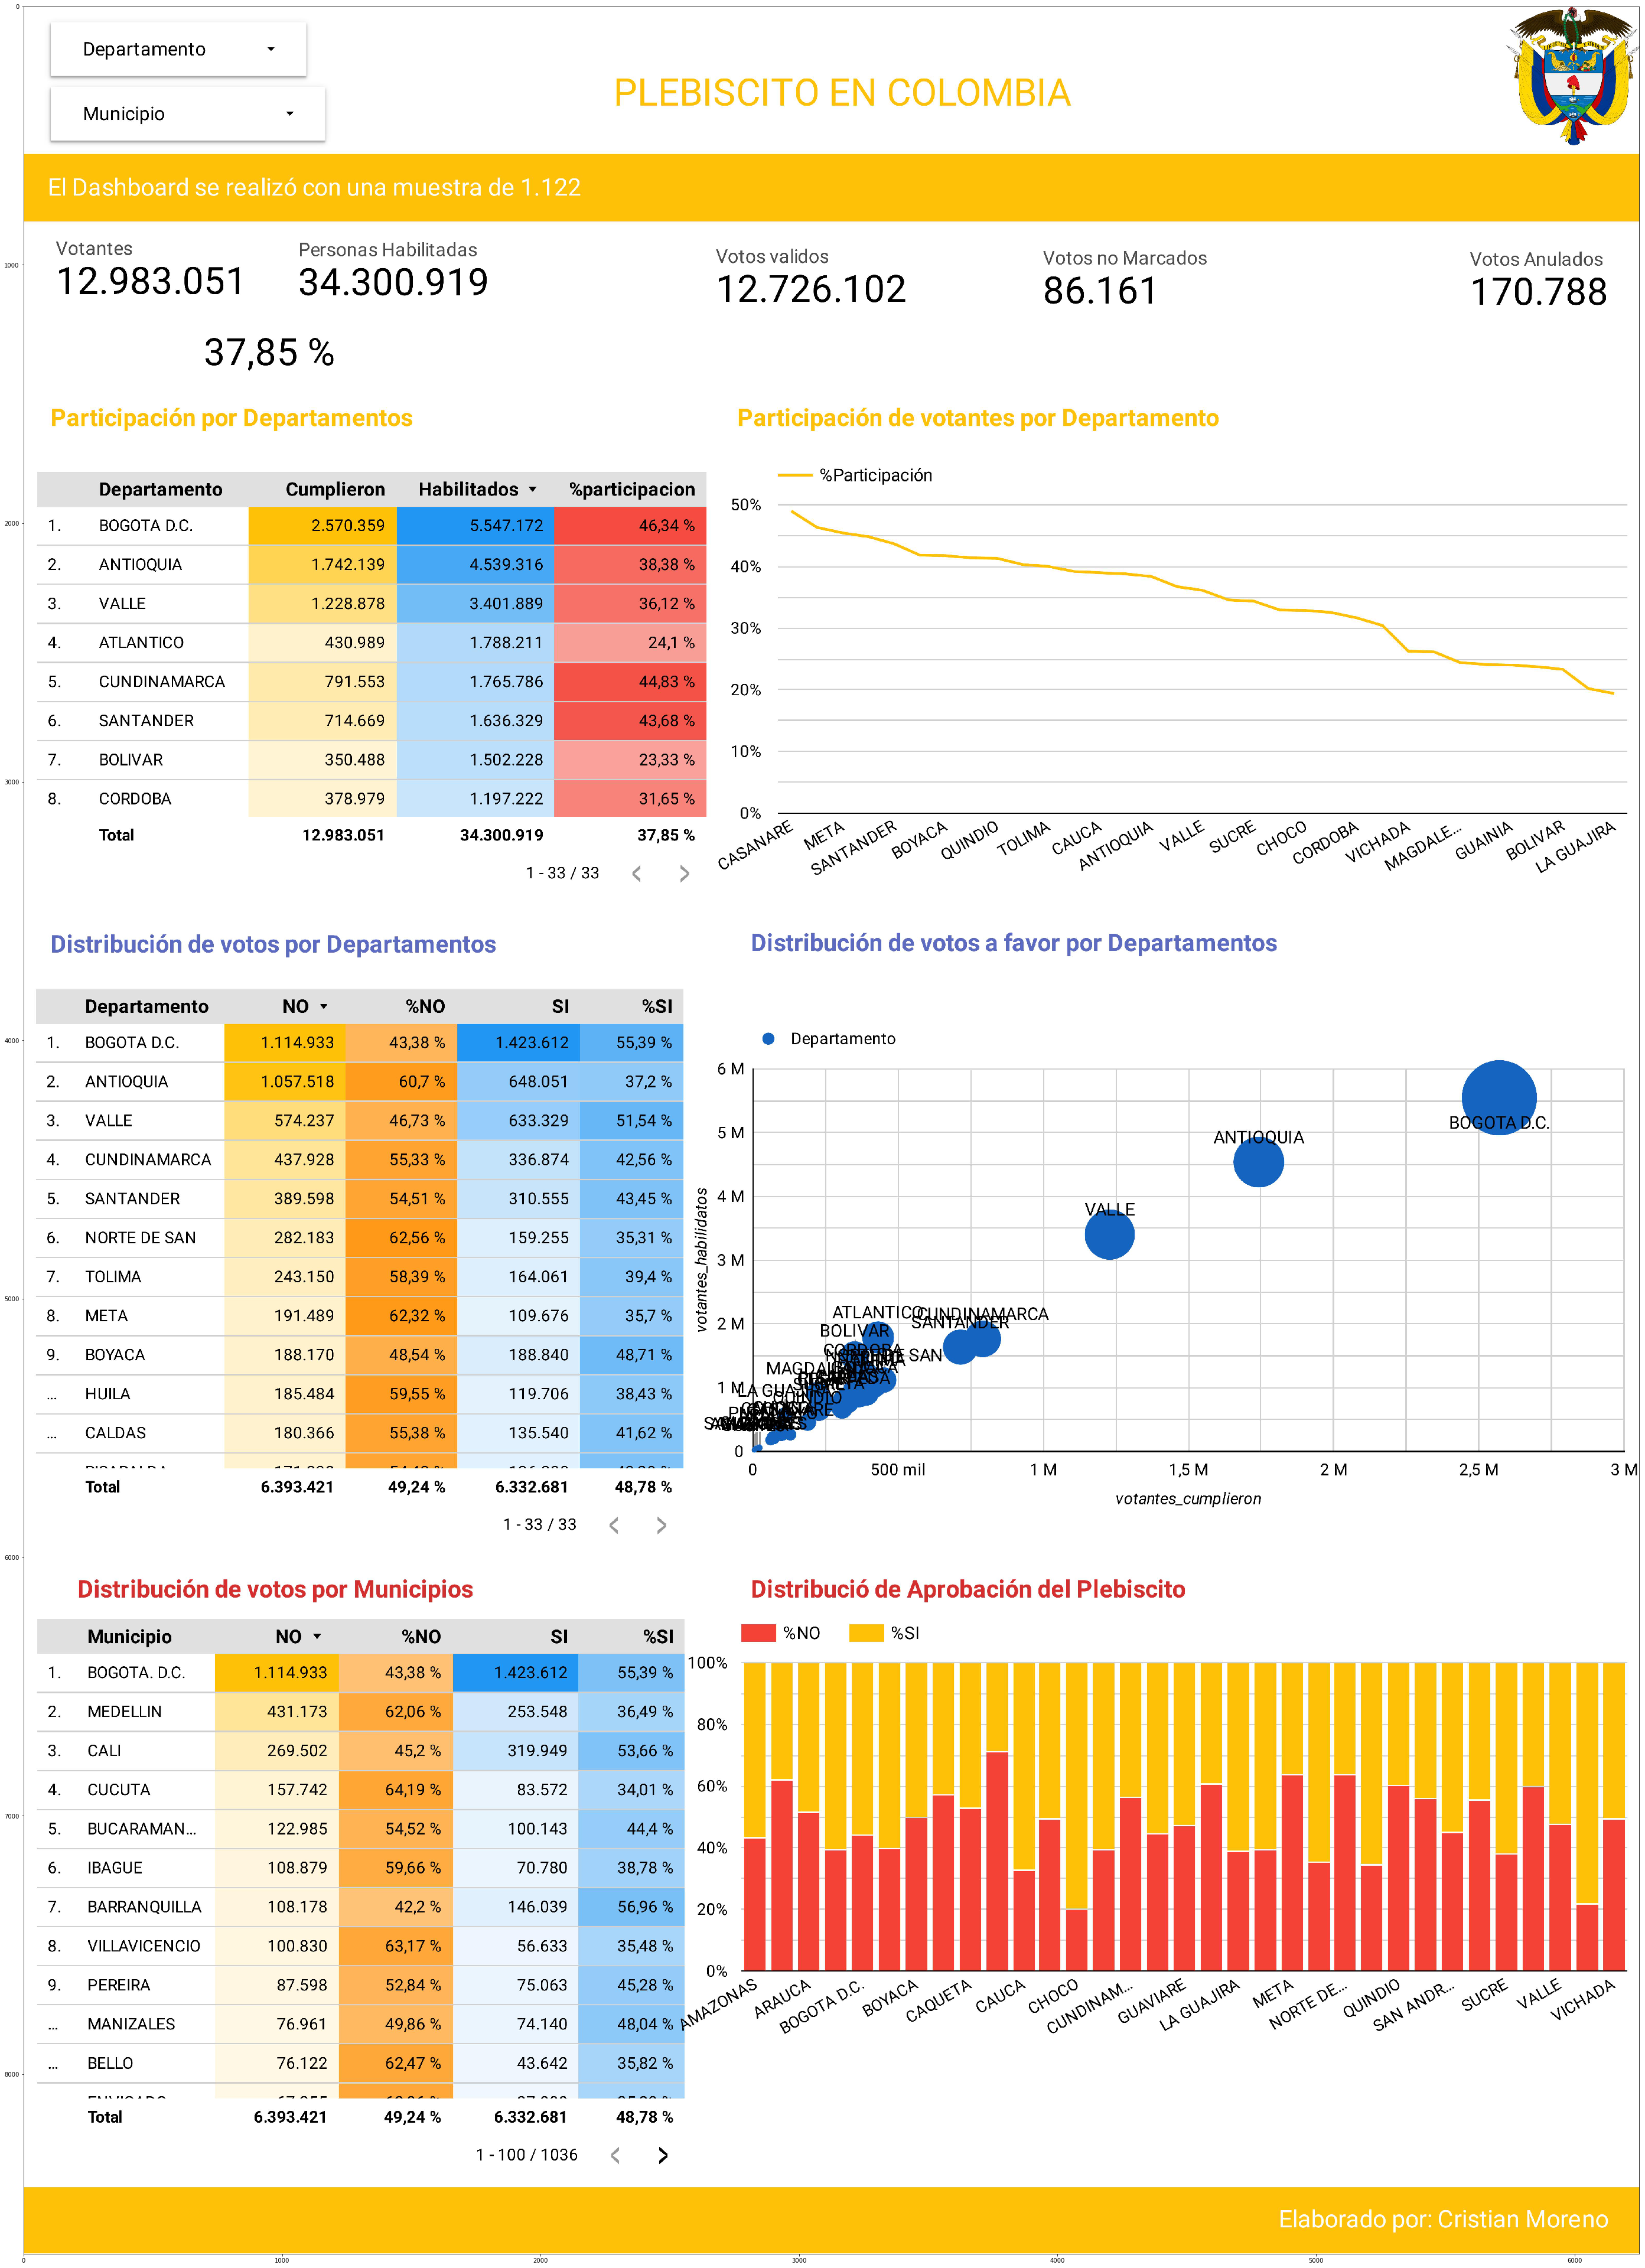

In [78]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('0.jpg')
fig = plt.figure()
fig.set_size_inches(500,70)
imgplot = plt.imshow(img)

plt.show();

A continuación se encuentra el link del informe realizado en DataStudio con base a los datos del Scraping realizado en este Script.
https://datastudio.google.com/s/ihmTvRRTqYs

El paso siguiente a esto, se propone analizar las votaciones según el PIB real por departamento para ver patrones de comportamiento